In [1]:
from glob import glob
import cv2
from sklearn.model_selection import train_test_split

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D, BatchNormalization, Dropout
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam 

## 1) The Dataset

- Assuming you have a classification problem, is it binary, multi-class or multi-label?

- Show a few examples per class

- How many classes?

- How many images per class?

- Train/Test sizes

- Image size?

- How are the images labeled?

- Dataset source(s)?

Binary clasyfication problem because i have 2 classes

Images are lebeled this way:

In [2]:
# Creating list of X and y
X_train = []
y_train = []

# Iterate the folder with glob
for fpath in glob('C:/Users/domin/Desktop/Block C/train/*.jpg'):
    # Opening images with OpenCV
    # Alternatives: PIL, Matplotlib
    im = cv2.imread(fpath, 1)
    
    # If the filename contains frying
    # label = 1
    # otherwise it must be microwaving so label = 0
    if 'spider' in fpath:
        label = 1
    else:
        label = 0
    im = cv2.resize(im,(256,256))
    # Put image array to X
    # Put label to y
    X_train.append(im)
    y_train.append(label)
        

# Convert the list of arrays
# Into a numpy array
X_train = np.array(X_train)
y_train = np.array(y_train)


X_train, X_test , y_train, y_test = train_test_split(X_train, y_train, test_size = 0.2)
X_test, X_val , y_test, y_val = train_test_split(X_test, y_test, test_size = 0.5)


I import some images form imsitu dataset and i scraped some data using this function:

In [3]:
# from pathlib import Path
# root = Path().cwd()/"images"

# from jmd_imagescraper.core import * 

# duckduckgo_search(root, "butterflies", "butterflies", max_results=200)

Example of spiders:

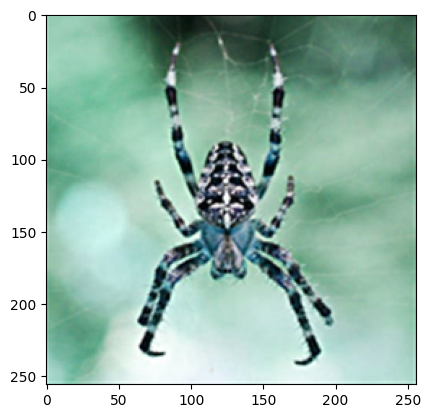

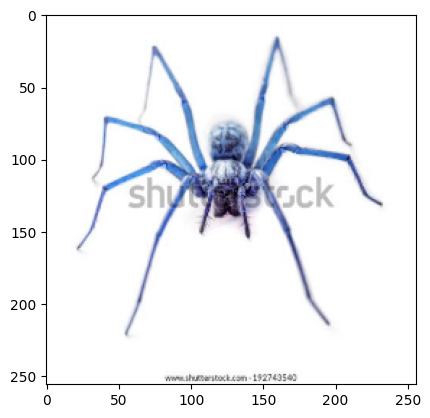

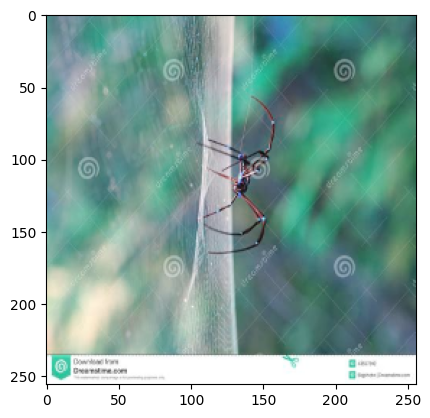

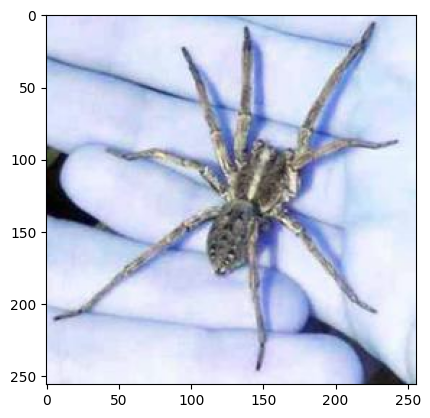

In [4]:
w = 0
for j in range(50):
   if w > 3:
      break
   elif y_train[j] == 1:
      plt.imshow(X_train[j])
      plt.show()
      w = w + 1

Example of butterflys:

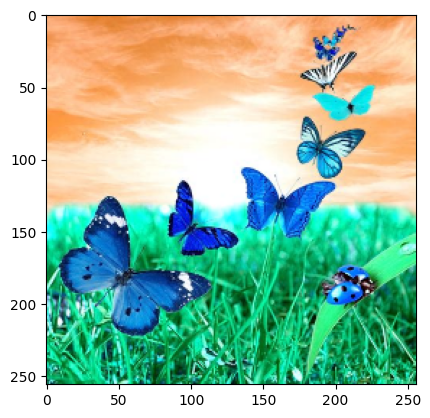

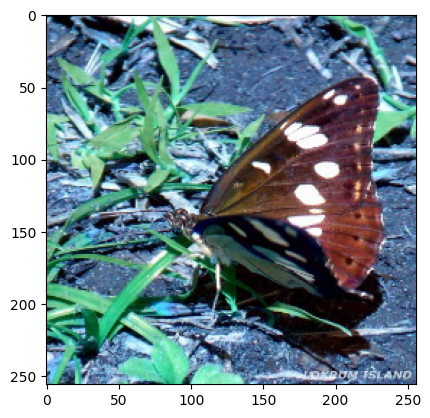

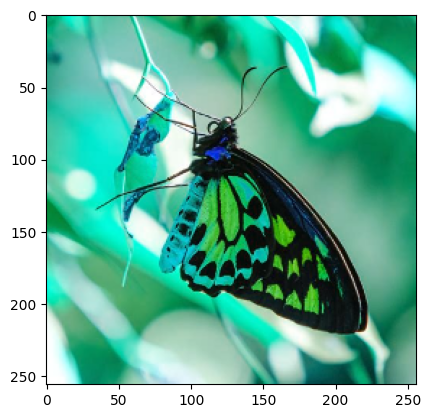

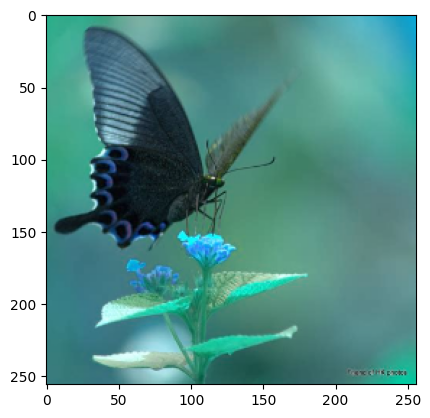

In [5]:
w = 0
for j in range(50):
   if w > 3:
      break
   elif y_train[j] == 0:
      plt.imshow(X_train[j])
      plt.show()
      w = w + 1

How many classes? 
2 classes 'spiders' and 'butterflys'

In [6]:
spiders = 0
butterflys = 0
for i in range(313):
    if y_train[i] == 1:
        spiders = spiders + 1
    else:
        butterflys = butterflys + 1 
for i in range(39):
    if y_test[i] == 1:
        spiders = spiders + 1
    else:
        butterflys = butterflys + 1 
for i in range(39):
    if y_val[i] == 1:
        spiders = spiders + 1
    else:
        butterflys = butterflys + 1
print(' Images of butterflys:', butterflys,'\n','Images of spiders:', spiders )

 Images of butterflys: 203 
 Images of spiders: 188


Train/Test/Val sizes

In [7]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape, X_val.shape, y_val.shape,)

(316, 256, 256, 3) (316,) (39, 256, 256, 3) (39,) (40, 256, 256, 3) (40,)


Image size

In [8]:
im.shape

(256, 256, 3)

## 2) Baselines

- Random guess accuracy?

- Human-Level Performance accuracy?

- Multilayer Perceptron accuracy?

Random accuracy: 50%

In [9]:
# i have 2 klases 
print("{0:.0%}".format(1/2))

50%


Human-Level performance accuracy: 100%

Multilayer Perception accyracy: 39% and 43% with Earlystopoing

In [10]:
pd.DataFrame({'Random guess (%)': [50],
              'MLP(%)': [43],
              'HLP(%)':[100]})

,Random guess (%),MLP(%),HLP(%)
0,50,43,100


## 3) Preprocessing

Explain all the preprocessing steps you did.

I did all preprocessing during loading data.

The image sizes are (256, 256). I converted these to (256, 256, 3) because Keras expects image channels.

## 4) CNN architecture

In [11]:
def build_model(print_summary=False):
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3,3), activation='relu',input_shape=(256,256, 3),padding='same'))
    model.add(MaxPool2D(2,2))
    model.add(BatchNormalization())
    model.add(Conv2D(64, kernel_size=(3,3), activation='relu',padding='same'))
    model.add(MaxPool2D(2,2))
    model.add(BatchNormalization())
    model.add(Conv2D(128, kernel_size=(3,3), activation='relu',padding='same'))
    model.add(MaxPool2D(2,2))
    model.add(Conv2D(64, kernel_size=(3,3), activation='relu',padding='same'))
    model.add(MaxPool2D(2,2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu') )
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))
    if print_summary:
        model.summary()
    return model
model = build_model(print_summary=True)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 32)     0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 128, 128, 32)     128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 64)       0         
 2D)                                                             
                                                        

## 5) CNN training

- Loss function

- Optimizer (with its hyper-parameters)

- Metrics

- Learning curves

In [12]:
from keras.optimizers import Adam
def compile_model(model, lr):
    model.compile(optimizer="adam", loss="binary_crossentropy", metrics='accuracy')
    opt = Adam(learning_rate=lr)
    model.compile(optimizer=opt, loss = 'binary_crossentropy',metrics='accuracy')
    return model

In [13]:
callback = EarlyStopping(monitor='val_loss', patience=3)
learning_rates = [1e-2, 1e-3, 1e-4, 1e-5, 1e-6]
histories = [] # for plotting val_loss vs epochs for each learning rate
best_val_losses = [] # for plotting best_val_loss vs learning rate
for lr in learning_rates:
    print('Training with: ', lr)
    model = build_model()
    model = compile_model(model, lr=lr)

    H = model.fit(X_train, y_train, epochs = 50, validation_data=(X_val, y_val),batch_size=8, callbacks=[callback])   
 
       
    best_loss = model.evaluate(X_test,y_test)
        
    best_val_losses.append(best_loss[0])
    histories.append(H.history["val_loss"])

Training with:  0.01
Epoch 1/50
40/40 [==============================] - 5s 50ms/step - loss: 22.1783 - accuracy: 0.5316 - val_loss: 0.6971 - val_accuracy: 0.4750
Epoch 2/50
40/40 [==============================] - 1s 33ms/step - loss: 0.6945 - accuracy: 0.5253 - val_loss: 0.7016 - val_accuracy: 0.4750
Epoch 3/50
40/40 [==============================] - 1s 33ms/step - loss: 0.6947 - accuracy: 0.5253 - val_loss: 0.6960 - val_accuracy: 0.4750
Epoch 4/50
40/40 [==============================] - 1s 33ms/step - loss: 0.6922 - accuracy: 0.5253 - val_loss: 0.6980 - val_accuracy: 0.4750
Epoch 5/50
40/40 [==============================] - 1s 33ms/step - loss: 0.6927 - accuracy: 0.5253 - val_loss: 0.6966 - val_accuracy: 0.4750
Epoch 6/50
2/2 [==============================] - 1s 312ms/step - loss: 0.6906 - accuracy: 0.5385
Training with:  0.001
Epoch 1/50
40/40 [==============================] - 2s 40ms/step - loss: 0.7069 - accuracy: 0.8196 - val_loss: 0.6692 - val_accuracy: 0.7000
Epoch 2/50
4

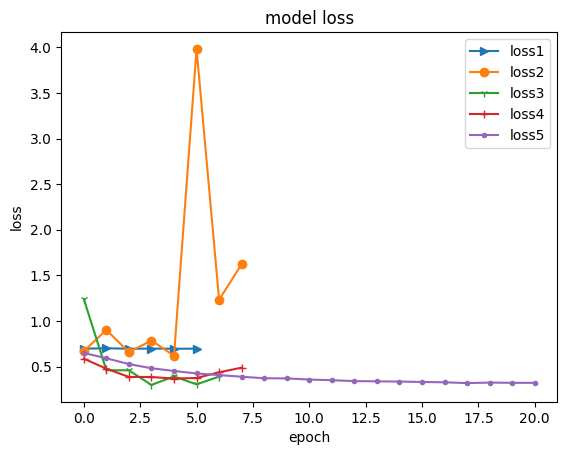

In [14]:
plt.plot(histories[0], marker = ">")
plt.plot(histories[1], marker = "o")
plt.plot(histories[2], marker = "1")
plt.plot(histories[3], marker = "+")
plt.plot(histories[4], marker = ".")
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss1', 'loss2', 'loss3', 'loss4', 'loss5'], loc='upper right')
plt.show()

In [15]:
model = build_model()
model = compile_model(model, lr = 1e-6)

In [16]:
H = model.fit(X_train, y_train, epochs = 100, validation_data=(X_val, y_val),batch_size=16,callbacks= callback)

Epoch 1/100
20/20 [==============================] - 4s 118ms/step - loss: 0.8009 - accuracy: 0.4715 - val_loss: 0.7980 - val_accuracy: 0.5250
Epoch 2/100
20/20 [==============================] - 1s 66ms/step - loss: 0.7342 - accuracy: 0.5759 - val_loss: 0.6788 - val_accuracy: 0.6000
Epoch 3/100
20/20 [==============================] - 1s 66ms/step - loss: 0.6627 - accuracy: 0.6361 - val_loss: 0.6367 - val_accuracy: 0.7000
Epoch 4/100
20/20 [==============================] - 1s 66ms/step - loss: 0.6386 - accuracy: 0.6772 - val_loss: 0.5982 - val_accuracy: 0.7750
Epoch 5/100
20/20 [==============================] - 1s 66ms/step - loss: 0.5858 - accuracy: 0.7215 - val_loss: 0.5629 - val_accuracy: 0.7750
Epoch 6/100
20/20 [==============================] - 1s 67ms/step - loss: 0.5584 - accuracy: 0.7215 - val_loss: 0.5314 - val_accuracy: 0.8000
Epoch 7/100
20/20 [==============================] - 1s 66ms/step - loss: 0.5143 - accuracy: 0.7690 - val_loss: 0.5003 - val_accuracy: 0.8250
Epoch

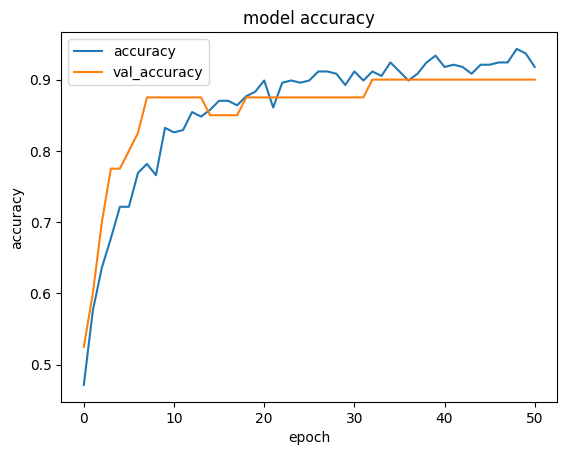

In [17]:
def accuracy_plotter(H):
    plt.plot(H.history['accuracy'])
    plt.plot(H.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['accuracy', 'val_accuracy'], loc='upper left')
    plt.show()
    
accuracy_plotter(H)

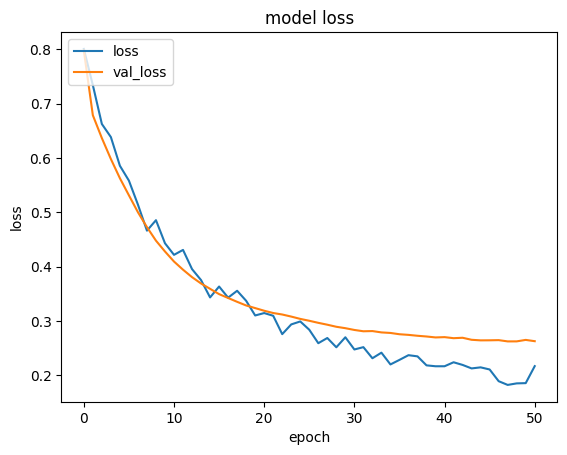

In [18]:
def loss_plotter(H):
    plt.plot(H.history['loss'])
    plt.plot(H.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['loss', 'val_loss'], loc='upper left')
    plt.show()

loss_plotter(H)

## 6) Model performance

Metrics plots

In [19]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 7ms/step - loss: 0.2424 - accuracy: 0.8974


[0.2423917055130005, 0.8974359035491943]

2/2 [==============================] - 0s 21ms/step


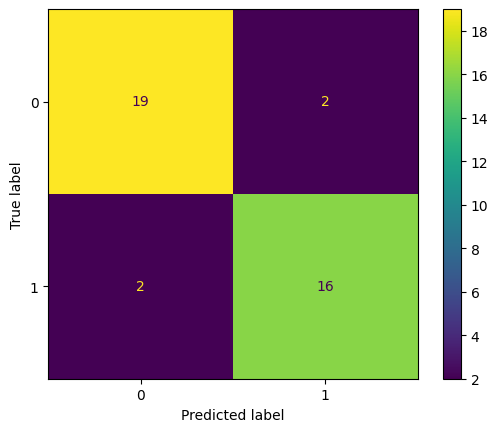

In [20]:
preds = model.predict(X_test)

import seaborn as sn
from sklearn import metrics

cm_display = metrics.ConfusionMatrixDisplay(metrics.confusion_matrix(y_test, np.rint(preds)))
cm_display.plot()
plt.show()

In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


accuracy = accuracy_score(y_test, np.rint(preds))
precision = precision_score(y_test, np.rint(preds))
recall = recall_score(y_test, np.rint(preds))
f1score = f1_score(y_test, np.rint(preds))

In [22]:
print('Accuracy:', np.round(accuracy, 4))
print('Precision:', np.round(precision, 4))
print('Recall:', np.round(recall, 4))
print('F1 Score:', np.round(f1score, 4))

Accuracy: 0.8974
Precision: 0.8889
Recall: 0.8889
F1 Score: 0.8889


In [23]:
pd.DataFrame({'Random guess (%)': [50],
              'MLP(%)': [43],
              'CNN(%)':[np.round(accuracy, 3)*100],
              'HLP(%)':[100]})

,Random guess (%),MLP(%),CNN(%),HLP(%)
0,50,43,89.7,100


In [24]:
img = cv2.imread("C:/Users/domin/Desktop/Block C/predict/images*jpg")

## 7) Error analysis

Top error interpretation

In [25]:
from sklearn.metrics import confusion_matrix

4


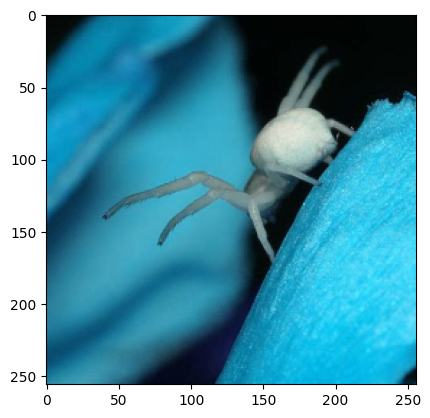

12


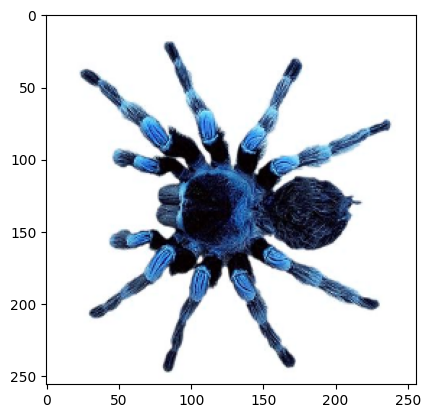

13


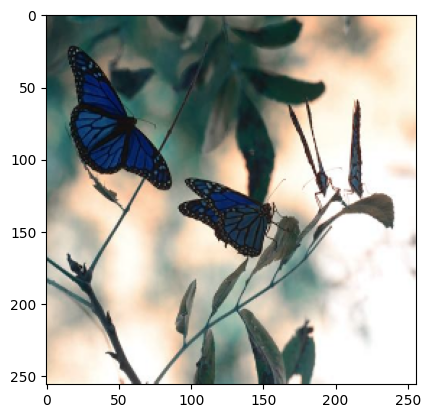

17


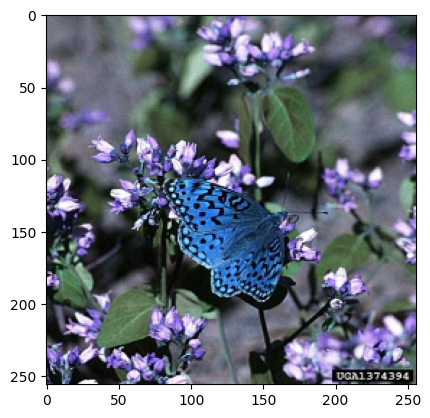

In [26]:
for i in range(39):
    if y_test[i] != np.rint(preds[i]):
        print(i)
        plt.imshow(X_test[i])
        plt.show() 
